# Data Cleaning & Wrangling

In [1]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv(r'/Users/markclampitt/Documents/Jan Sem 2022/617-Predictive Strategy/Predictive_Proj/BikeRentalData.csv')

# Initial Look at Dataset

In [3]:
df.shape

(9601139, 26)

In [4]:
df.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [5]:
df.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,4.923152e+06,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.841734e+06,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,2.466320e+06,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,4.921318e+06,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,7.389176e+06,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,9.830310e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [6]:
df.isnull().count()

Unnamed: 0    9601139
Duration      9601139
Distance      9601139
PLong         9601139
PLatd         9601139
DLong         9601139
DLatd         9601139
Haversine     9601139
Pmonth        9601139
Pday          9601139
Phour         9601139
Pmin          9601139
PDweek        9601139
Dmonth        9601139
Dday          9601139
Dhour         9601139
Dmin          9601139
DDweek        9601139
Temp          9601139
Precip        9601139
Wind          9601139
Humid         9601139
Solar         9601139
Snow          9601139
GroundTemp    9601139
Dust          9601139
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of          Unnamed: 0  Duration  Distance      PLong       PLatd      DLong  \
0                 0         3        50  37.544666  126.888359  37.544666   
1                 1        24      7670  37.506199  127.003944  37.551250   
2                 2         8      1390  37.544590  127.057083  37.537014   
3                 3         8      1820  37.571102  127.023560  37.561447   
4                 4         4       850  37.573242  127.015907  37.565849   
...             ...       ...       ...        ...         ...        ...   
9601134     9830306        67      6930  37.562607  127.051308  37.562607   
9601135     9830307        58      8320  37.511982  127.085052  37.476028   
9601136     9830308       118      2730  37.506199  127.003944  37.514870   
9601137     9830309        90     17170  37.489750  126.927467  37.565903   
9601138     9830310       116      1410  37.585655  127.075050  37.585655   

              DLatd  Haversine  Pmonth  Pda

# Data Cleaning

In [8]:
 df.isnull().sum(axis = 0)

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There were no null values

In [9]:
df.shape

(9601139, 26)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(9601139, 26)

No duplicates found

# Removing Outlier

In [6]:
df_describeDF = df.describe().T

In [13]:
df_describeDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Unnamed: 0 to Dust
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   26 non-null     float64
 1   mean    26 non-null     float64
 2   std     26 non-null     float64
 3   min     26 non-null     float64
 4   25%     26 non-null     float64
 5   50%     26 non-null     float64
 6   75%     26 non-null     float64
 7   max     26 non-null     float64
dtypes: float64(8)
memory usage: 2.9+ KB


In [7]:
df_describeDF['Upper Limit'] = df_describeDF['mean'] + (3* df_describeDF['std'])

In [15]:
df_describeDF

,count,mean,std,min,25%,50%,75%,max,Upper Limit
Unnamed: 0,9601139.0,4.923152e+06,2.841734e+06,0.000000,2.466320e+06,4.921318e+06,7.389176e+06,9.830310e+06,1.344835e+07
Duration,9601139.0,2.580294e+01,2.504333e+01,1.000000,8.000000e+00,1.600000e+01,3.600000e+01,1.190000e+02,1.009329e+02
Distance,9601139.0,3.713519e+03,3.956611e+03,1.000000,1.230000e+03,2.280000e+03,4.620000e+03,3.329000e+04,1.558335e+04
PLong,9601139.0,3.754761e+01,4.441376e-02,37.437271,3.751424e+01,3.754693e+01,3.757324e+01,3.768972e+01,3.768085e+01
PLatd,9601139.0,1.269908e+02,8.257065e-02,126.798599,1.269200e+02,1.269943e+02,1.270618e+02,1.271803e+02,1.272385e+02
DLong,9601139.0,3.754770e+01,4.445305e-02,37.437271,3.751424e+01,3.754655e+01,3.757324e+01,3.768972e+01,3.768105e+01
DLatd,9601139.0,1.269907e+02,8.323726e-02,126.798599,1.269194e+02,1.269947e+02,1.270624e+02,1.271803e+02,1.272404e+02
Haversine,9601139.0,1.870315e+00,1.995361e+00,0.000000,6.758669e-01,1.257498e+00,2.363812e+00,2.863448e+01,7.856398e+00
Pmonth,9601139.0,7.578754e+00,2.696797e+00,1.000000,6.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01,1.566915e+01
Pday,9601139.0,1.576714e+01,8.748012e+00,1.000000,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01,4.201117e+01


In [8]:
df['Duration'].mean()

25.80293723484266

In [9]:
Duration_Upper_limit = (df['Duration'].std() * 3) + df['Duration'].mean()

In [10]:
Duration_Upper_limit

100.93291746262551

In [11]:
Duration_Outliers = df[df['Duration'] > df_describeDF.loc['Duration','Upper Limit']]

In [20]:
Duration_Outliers.sample(10)

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
3266603,3354374,105,19290,37.531422,126.951500,37.531422,126.951500,0.000000,6,25,...,55,0,30.7,0.0,1.6,43.0,0.74,0.0,35.7,59.0
6961766,7142190,108,4750,37.568420,126.899429,37.563965,126.898209,0.506910,10,3,...,25,2,23.4,0.0,1.6,35.0,2.51,0.0,38.8,23.0
7340194,7533079,103,8160,37.547829,127.072632,37.548222,127.067879,0.421298,10,11,...,44,3,9.3,0.0,1.5,52.0,0.00,0.0,7.4,14.0
4707943,4826813,107,15710,37.559177,126.934525,37.559177,126.934525,0.000000,8,8,...,55,2,31.0,0.0,2.9,66.0,0.02,0.0,31.5,22.0
7797050,8000256,102,12260,37.528816,126.924530,37.528816,126.924530,0.000000,10,21,...,14,6,20.9,0.0,1.5,23.0,1.87,0.0,30.1,46.0
4188391,4296809,118,690,37.560474,127.014076,37.555859,127.013855,0.513535,7,23,...,49,0,34.1,0.0,2.3,47.0,2.94,0.0,55.1,22.0
4500295,4614767,101,19370,37.580811,126.886650,37.579399,126.889160,0.271247,8,1,...,36,2,34.5,0.0,2.8,62.0,0.02,0.0,34.3,34.0
9013407,9238054,108,3650,37.498470,127.030113,37.498470,127.030113,0.000000,11,27,...,14,1,7.9,0.0,1.2,64.0,0.87,0.0,10.5,86.0
1517549,1553900,116,14850,37.491928,127.056969,37.491928,127.056969,0.000000,5,5,...,30,5,22.7,0.0,3.4,35.0,2.51,0.0,33.3,64.0
6806088,6982723,110,20550,37.513962,127.121674,37.500614,126.986160,12.045263,9,30,...,25,6,21.3,0.0,3.8,32.0,2.31,0.0,35.5,21.0


In [12]:
Duration_Outliers.shape[0]/df.shape[0]

0.023986529098266363

2% of rows contain Duration outliers

In [13]:
df.shape

(9601139, 26)

In [14]:
df_NoOutliers = df[df['Duration'] < Duration_Upper_limit]

In [15]:
df_NoOutliers['Duration'].max()

100

In [16]:
df_NoOutliers.shape

(9370841, 26)

In [17]:
for i in df_NoOutliers.columns:
    Upper_Limit = df[i].mean() + (df[i].std() * 3)
    df_NoOutliers = df_NoOutliers[df_NoOutliers[i] < Upper_Limit]

In [18]:
df_NoOutliers.shape

(8820426, 26)

In [19]:
1 - (df_NoOutliers.shape[0]/df.shape[0])

0.08131462319210248

8% of rows included outliers and were removed from the df

In [20]:
print(df['Duration'].mean(),
df_NoOutliers['Duration'].mean())

25.80293723484266 22.540515390072997


Dropping outliers reduced duration mean time by 3 minutes

# Data Wrangling

# Duration per Distance

In [21]:
df_NoOutliers['Duration_per_Distance'] = df_NoOutliers['Distance']/df_NoOutliers['Duration']

In [22]:
df_NoOutliers['Duration_per_Distance'].mean()

162.53973919887545

In [23]:
df_NoOutliers.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,16.666667
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,319.583333
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,173.750000
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,227.500000
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,212.500000


In [24]:
df_NoOutliers = df_NoOutliers.drop('Unnamed: 0',axis=1)

In [25]:
df_NoOutliers.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust', 'Duration_per_Distance'],
      dtype='object')

Since I won't be using Latitude and Longitude information in terms of mapping locations for modeling purposes, I combined the pickup Lat and Long into one column, as well as dropoff Lat & Long into one column as shown below

In [26]:
df_NoOutliers['Pickup Location'] = df_NoOutliers['PLong'] + df_NoOutliers['PLatd']

In [27]:
df_NoOutliers['Dropoff Location'] = df_NoOutliers['DLong'] + df_NoOutliers['DLatd']

In [28]:
df_NoOutliers.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,16.666667,164.433025,164.433025
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,319.583333,164.510143,164.586353
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,173.750000,164.601673,164.598110
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,227.500000,164.594662,164.596367
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,0.0,0.5,40.0,0.0,0.0,-2.2,25.0,212.500000,164.589149,164.582252


# Correlation Values

In [45]:

df_NoOutliers.corr()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location
Duration,1.000000,0.759979,-0.040199,0.001386,-0.038058,0.001300,0.318278,-0.052143,-0.009248,0.137284,...,-0.013839,0.078171,-0.096417,0.064673,-0.014281,0.111263,-0.015672,-0.334962,-0.016874,-0.015895
Distance,0.759979,1.000000,-0.044414,-0.009095,-0.041990,-0.009278,0.578660,-0.048435,-0.008346,0.100723,...,-0.012757,0.034391,-0.034081,-0.012250,-0.012276,0.057170,-0.033387,0.110012,-0.027554,-0.026524
PLong,-0.040199,-0.044414,1.000000,0.126653,0.947421,0.127584,-0.030014,-0.007342,0.000687,-0.011951,...,-0.001521,-0.002669,0.003018,0.008440,-0.000280,0.002467,0.003918,-0.006491,0.554878,0.529875
PLatd,0.001386,-0.009095,0.126653,1.000000,0.128974,0.975603,0.007950,0.016488,0.001348,0.005032,...,-0.005180,-0.003991,-0.001091,-0.005025,-0.001518,0.000055,-0.003199,-0.012035,0.895509,0.876068
DLong,-0.038058,-0.041990,0.947421,0.128974,1.000000,0.129444,-0.026876,-0.007160,0.000592,-0.005465,...,-0.001582,-0.001207,0.002602,0.004909,-0.000555,0.002476,0.002966,-0.009202,0.533235,0.554902
DLatd,0.001300,-0.009278,0.127584,0.975603,0.129444,1.000000,0.008024,0.016414,0.001276,0.008272,...,-0.005082,-0.002621,-0.002455,-0.005286,-0.001725,0.000586,-0.003264,-0.013200,0.875466,0.896746
Haversine,0.318278,0.578660,-0.030014,0.007950,-0.026876,0.008024,1.000000,-0.028717,-0.002948,-0.001921,...,-0.007868,-0.006776,0.017849,-0.053428,-0.006601,-0.015282,-0.017883,0.175121,-0.006798,-0.005262
Pmonth,-0.052143,-0.048435,-0.007342,0.016488,-0.007160,0.016414,-0.028717,1.000000,-0.071153,-0.018869,...,-0.000481,-0.169467,0.009538,-0.128708,0.018839,-0.146091,-0.087162,0.026456,0.010534,0.010576
Pday,-0.009248,-0.008346,0.000687,0.001348,0.000592,0.001276,-0.002948,-0.071153,1.000000,-0.004703,...,-0.005977,-0.015334,-0.036413,-0.002230,0.041807,-0.018011,0.089080,0.005204,0.001439,0.001335
Phour,0.137284,0.100723,-0.011951,0.005032,-0.005465,0.008272,-0.001921,-0.018869,-0.004703,1.000000,...,-0.020512,0.237199,-0.202866,-0.079184,-0.006556,0.092892,-0.040451,-0.125956,-0.001141,0.004501


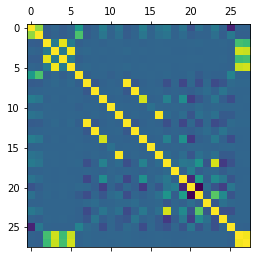

In [46]:
import matplotlib.pyplot as plt
plt.matshow(df_NoOutliers.corr())
plt.show()

In [47]:

corr = df_NoOutliers.corr()
corr.style.background_gradient(cmap='coolwarm')

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location
Duration,1.000000,0.759979,-0.040199,0.001386,-0.038058,0.001300,0.318278,-0.052143,-0.009248,0.137284,-0.006130,0.080938,-0.052013,-0.009287,0.143244,-0.011418,0.081314,0.120720,-0.013839,0.078171,-0.096417,0.064673,-0.014281,0.111263,-0.015672,-0.334962,-0.016874,-0.015895
Distance,0.759979,1.000000,-0.044414,-0.009095,-0.041990,-0.009278,0.578660,-0.048435,-0.008346,0.100723,-0.013608,0.056537,-0.048309,-0.008339,0.097200,-0.004426,0.056873,0.089221,-0.012757,0.034391,-0.034081,-0.012250,-0.012276,0.057170,-0.033387,0.110012,-0.027554,-0.026524
PLong,-0.040199,-0.044414,1.000000,0.126653,0.947421,0.127584,-0.030014,-0.007342,0.000687,-0.011951,0.002654,0.002958,-0.007343,0.000671,-0.014361,0.000429,0.002849,-0.002068,-0.001521,-0.002669,0.003018,0.008440,-0.000280,0.002467,0.003918,-0.006491,0.554878,0.529875
PLatd,0.001386,-0.009095,0.126653,1.000000,0.128974,0.975603,0.007950,0.016488,0.001348,0.005032,0.001782,0.007740,0.016490,0.001315,0.003075,-0.000465,0.007692,0.002816,-0.005180,-0.003991,-0.001091,-0.005025,-0.001518,0.000055,-0.003199,-0.012035,0.895509,0.876068
DLong,-0.038058,-0.041990,0.947421,0.128974,1.000000,0.129444,-0.026876,-0.007160,0.000592,-0.005465,0.002037,0.001701,-0.007159,0.000574,-0.008647,0.000113,0.001651,-0.000161,-0.001582,-0.001207,0.002602,0.004909,-0.000555,0.002476,0.002966,-0.009202,0.533235,0.554902
DLatd,0.001300,-0.009278,0.127584,0.975603,0.129444,1.000000,0.008024,0.016414,0.001276,0.008272,0.001237,0.007749,0.016415,0.001257,0.006012,-0.000673,0.007682,0.003684,-0.005082,-0.002621,-0.002455,-0.005286,-0.001725,0.000586,-0.003264,-0.013200,0.875466,0.896746
Haversine,0.318278,0.578660,-0.030014,0.007950,-0.026876,0.008024,1.000000,-0.028717,-0.002948,-0.001921,-0.021489,0.000733,-0.028676,-0.002887,-0.001531,0.004905,0.001161,0.011403,-0.007868,-0.006776,0.017849,-0.053428,-0.006601,-0.015282,-0.017883,0.175121,-0.006798,-0.005262
Pmonth,-0.052143,-0.048435,-0.007342,0.016488,-0.007160,0.016414,-0.028717,1.000000,-0.071153,-0.018869,0.000113,-0.012449,0.999895,-0.070820,-0.018987,0.000674,-0.012530,-0.123714,-0.000481,-0.169467,0.009538,-0.128708,0.018839,-0.146091,-0.087162,0.026456,0.010534,0.010576
Pday,-0.009248,-0.008346,0.000687,0.001348,0.000592,0.001276,-0.002948,-0.071153,1.000000,-0.004703,0.000290,0.005777,-0.070910,0.997123,-0.004922,0.000823,0.006160,-0.022348,-0.005977,-0.015334,-0.036413,-0.002230,0.041807,-0.018011,0.089080,0.005204,0.001439,0.001335
Phour,0.137284,0.100723,-0.011951,0.005032,-0.005465,0.008272,-0.001921,-0.018869,-0.004703,1.000000,-0.019564,-0.004874,-0.018674,-0.004801,0.904959,-0.019907,-0.003815,0.167419,-0.020512,0.237199,-0.202866,-0.079184,-0.006556,0.092892,-0.040451,-0.125956,-0.001141,0.004501


# Exploratory Data Analysis

# Pickup & Droppoff Locations

In [38]:
df_NoOutliers['Pickup Location'].value_counts()


164.459087    54528
164.599052    48233
164.481304    46866
164.614086    39342
164.410622    34959
              ...  
164.696663        9
164.377422        7
164.632916        7
164.598370        4
164.575737        2
Name: Pickup Location, Length: 1512, dtype: int64

1,512 Pikcup Locations

In [39]:
df_NoOutliers['Dropoff Location'].value_counts()

164.481304    60027
164.599052    53960
164.459087    49228
164.614086    39684
164.611568    36115
              ...  
164.502781        5
164.598370        3
164.377422        2
164.680035        1
164.324218        1
Name: Dropoff Location, Length: 1515, dtype: int64

1,515 Dropoff Locations

In [40]:
Drop_Locations = list(df_NoOutliers['Dropoff Location'].unique())

In [41]:
Pickup_Locations = list(df_NoOutliers['Pickup Location'].unique())

In [42]:
Locations = Drop_Locations + Pickup_Locations

In [43]:
Locations

[164.433025,
 164.586353,
 164.59811000000002,
 164.596367,
 164.58225199999998,
 164.581035,
 164.396255,
 164.47208799999999,
 164.592243,
 164.508889,
 164.546585,
 164.56824899999998,
 164.434261,
 164.635376,
 164.688199,
 164.44521400000002,
 164.597893,
 164.61435,
 164.625367,
 164.408184,
 164.49555900000001,
 164.45462799999999,
 164.495887,
 164.36634099999998,
 164.389416,
 164.494259,
 164.738251,
 164.565495,
 164.48456099999999,
 164.466454,
 164.626262,
 164.491836,
 164.429142,
 164.703438,
 164.618805,
 164.648109,
 164.50505099999998,
 164.670078,
 164.419185,
 164.591103,
 164.541698,
 164.605889,
 164.494797,
 164.539769,
 164.63734399999998,
 164.614086,
 164.61026,
 164.520828,
 164.577583,
 164.579063,
 164.387062,
 164.718101,
 164.588753,
 164.385223,
 164.508003,
 164.467129,
 164.53064,
 164.622501,
 164.58281,
 164.51495,
 164.481304,
 164.353248,
 164.40908100000001,
 164.611568,
 164.528286,
 164.665897,
 164.506759,
 164.52401,
 164.38350300000002,
 164.

In [44]:
len(Locations)

3027

In [45]:
Unique_Locations = []

In [46]:
 
for i in Locations:
    if i not in Unique_Locations:
        Unique_Locations.append(i)

In [47]:
len(Unique_Locations)

1516

1,516 Unique Locations

In [48]:
Pickup_DropOff_Combinations = len(Unique_Locations) * len(Unique_Locations)

# Total Possible Pickup & Dropoff Locations Possible

In [49]:
print('There are', "{:,}".format(Pickup_DropOff_Combinations), 'possible pickup and dropoff combinations')

There are 2,298,256 possible pickup and dropoff combinations


In [50]:
df_NoOutliers['P_D']= df_NoOutliers['Dropoff Location'] + df_NoOutliers['Pickup Location']

In [51]:
Total_Pickup_Dropoff_Combinations_Used = "{:,}".format(df_NoOutliers['P_D'].value_counts().count())

In [52]:
Total_Pickup_Dropoff_Combinations_Used

'150,329'

# Total Pickup & Dropoff Locations Actually Used

In [53]:
print('There were',Total_Pickup_Dropoff_Combinations_Used , 'pickup and dropoff combinations actually used')

There were 150,329 pickup and dropoff combinations actually used


# Rentals With Same Pickup & Dropoff Locations

In [54]:
Same_Locations = df_NoOutliers[df_NoOutliers['Dropoff Location'] == df_NoOutliers['Pickup Location']]['Pickup Location'].count()

In [55]:
Same_Locations/df_NoOutliers.shape[0]

0.0923407780984728

10% of rentals had same pickup and dropoff location

# Rentals With Different Pickup & Dropoff Locations

In [56]:
Different_Locations = ( df_NoOutliers.shape[0] - Same_Locations)/df_NoOutliers.shape[0]

In [57]:
Different_Locations

0.9076592219015273

90% of rentals have a different pickcup & dropoff location

In [58]:
df_NoOutliers['Diff P_D Locations'] = df_NoOutliers.apply(lambda x: 0 if x['Pickup Location'] == x['Dropoff Location'] else (1),axis =1)
                                                          
                                                          

In [59]:
df_NoOutliers.sample(10)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location,P_D,Diff P_D Locations
4759970,21,2250,37.557587,127.079697,37.547829,127.072632,1.251084,8,10,15,...,47.0,2.21,0.0,43.7,10.0,107.142857,164.637284,164.620461,329.257745,1
141499,4,460,37.481705,126.950829,37.479164,126.952583,0.322160,1,27,16,...,25.0,0.74,0.0,-0.1,52.0,115.000000,164.432534,164.431747,328.864281,1
9178486,35,4820,37.665665,127.042671,37.656200,127.063622,2.123419,12,4,15,...,64.0,0.74,0.0,10.9,43.0,137.714286,164.708336,164.719822,329.428158,1
8351379,5,1180,37.519314,126.933167,37.526989,126.932098,0.858614,11,5,7,...,86.0,0.00,0.0,4.4,42.0,236.000000,164.452481,164.459087,328.911568,1
5359064,2,550,37.464550,126.883728,37.466530,126.888718,0.492372,8,28,0,...,88.0,0.00,0.0,23.1,8.0,275.000000,164.348278,164.355248,328.703526,1
93699,12,2380,37.506359,126.969078,37.513359,126.948059,2.010752,1,17,17,...,57.0,0.19,0.0,2.4,89.0,198.333333,164.475437,164.461418,328.936855,1
7298736,10,1700,37.569183,127.009880,37.579784,127.002533,1.344899,10,11,0,...,53.0,0.00,0.0,7.0,7.0,170.000000,164.579063,164.582317,329.161380,1
4371649,51,7490,37.604736,126.915337,37.604736,126.915337,0.000000,7,28,20,...,82.0,0.01,0.0,28.1,0.0,146.862745,164.520073,164.520073,329.040146,0
5894399,46,2320,37.492077,127.071976,37.502213,127.067207,1.203039,9,10,19,...,47.0,0.05,0.0,23.9,15.0,50.434783,164.564053,164.569420,329.133473,1
2774951,28,4520,37.557629,126.952156,37.574478,126.910049,4.157353,6,12,21,...,70.0,0.00,0.0,19.7,16.0,161.428571,164.509785,164.484527,328.994312,1


In [60]:
df_NoOutliers.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location,P_D,Diff P_D Locations
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,16.666667,164.433025,164.433025,328.866050,0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,319.583333,164.510143,164.586353,329.096496,1
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,173.750000,164.601673,164.598110,329.199783,1
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,227.500000,164.594662,164.596367,329.191029,1
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,212.500000,164.589149,164.582252,329.171401,1


In [61]:
df_NoOutliers['Pickup Location'].value_counts()

164.459087    54528
164.599052    48233
164.481304    46866
164.614086    39342
164.410622    34959
              ...  
164.696663        9
164.377422        7
164.632916        7
164.598370        4
164.575737        2
Name: Pickup Location, Length: 1512, dtype: int64

In [62]:
df_NoOutliers[df_NoOutliers['Pickup Location'] == 164.459087]['Pickup Location'].count()

54528

In [63]:
df_NoOutliers[df_NoOutliers['Dropoff Location'] == 164.459087]['Dropoff Location'].count()

49228

# Created DataFrame to begin exploring the number of pickups to dropoffs at each location for EDA Phase

In [64]:
Pickup_Dropoff_db = pd.DataFrame(index=range(1,1517))

In [65]:
Pickup_Dropoff_db

""
1
2
3
4
5
...
1512
1513
1514
1515


In [66]:
Pickup_Dropoff_db['Locations'] = Unique_Locations

In [67]:
Pickup_Dropoff_db

,Locations
1,164.433025
2,164.586353
3,164.598110
4,164.596367
5,164.582252
...,...
1512,164.377422
1513,164.522808
1514,164.489593
1515,164.502781


In [68]:
Pickup_Dropoff_db['Locations'].iloc[0]

164.433025

In [69]:
Pickup_Dropoff_db['Pickups'] = ''
Pickup_Dropoff_db['Dropoffs'] = ''

In [70]:
Start = 0
End = 1516

while Start <= End:
    Pickup_Dropoff_db['Pickups'].iloc[Start] = df_NoOutliers['Pickup Location'][df_NoOutliers['Pickup Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()
    Start = Start + 1




<ipython-input-70-d88fa9a3f46c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pickup_Dropoff_db['Pickups'].iloc[Start] = df_NoOutliers['Pickup Location'][df_NoOutliers['Pickup Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()


IndexError: single positional indexer is out-of-bounds

In [71]:
Start = 0
End = 1516

while Start <= End:
    Pickup_Dropoff_db['Dropoffs'].iloc[Start] = df_NoOutliers['Dropoff Location'][df_NoOutliers['Dropoff Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()
    Start = Start + 1


<ipython-input-71-51a6b0d0306f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pickup_Dropoff_db['Dropoffs'].iloc[Start] = df_NoOutliers['Dropoff Location'][df_NoOutliers['Dropoff Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()


IndexError: single positional indexer is out-of-bounds

In [72]:
 Pickup_Dropoff_db

,Locations,Pickups,Dropoffs
1,164.433025,7738,9705
2,164.586353,9885,11441
3,164.598110,6016,6385
4,164.596367,11621,11313
5,164.582252,14056,12882
...,...,...,...
1512,164.377422,7,2
1513,164.522808,25,22
1514,164.489593,17,16
1515,164.502781,10,5


In [73]:
df_NoOutliers['Dropoff Location'][df_NoOutliers['Dropoff Location'] == 164.433025].count()

9705

In [74]:
df_NoOutliers[df_NoOutliers['Dropoff Location'] == 164.433025].sample(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location,P_D,Diff P_D Locations
9571519,10,1770,37.534718,126.900002,37.544666,126.888359,1.509120,12,28,18,...,25.0,0.01,0.0,-3.2,43.0,177.000000,164.434720,164.433025,328.867745,1
3734883,3,1180,37.535873,126.892181,37.544666,126.888359,1.034181,7,11,12,...,73.0,0.87,0.0,29.4,21.0,393.333333,164.428054,164.433025,328.861079,1
1111070,28,4360,37.544666,126.888359,37.544666,126.888359,0.000000,4,18,23,...,42.0,0.00,0.0,6.9,75.0,155.714286,164.433025,164.433025,328.866050,0
7624659,67,7150,37.544666,126.888359,37.544666,126.888359,0.000000,10,17,22,...,50.0,0.00,0.0,8.2,10.0,106.716418,164.433025,164.433025,328.866050,0
9345560,7,1020,37.538460,126.894508,37.544666,126.888359,0.877568,12,14,17,...,35.0,0.27,0.0,-0.4,43.0,145.714286,164.432968,164.433025,328.865993,1


In [75]:
 Pickup_Dropoff_db['P-D_Difference'] =  Pickup_Dropoff_db['Pickups'] - Pickup_Dropoff_db['Dropoffs'] 

In [76]:
 Pickup_Dropoff_db['D-P_Difference'] =  Pickup_Dropoff_db['Dropoffs'] - Pickup_Dropoff_db['Pickups'] 

In [77]:
 Pickup_Dropoff_db

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference
1,164.433025,7738,9705,-1967,1967
2,164.586353,9885,11441,-1556,1556
3,164.598110,6016,6385,-369,369
4,164.596367,11621,11313,308,-308
5,164.582252,14056,12882,1174,-1174
...,...,...,...,...,...
1512,164.377422,7,2,5,-5
1513,164.522808,25,22,3,-3
1514,164.489593,17,16,1,-1
1515,164.502781,10,5,5,-5


In [78]:
 Pickup_Dropoff_db['P-D_Difference'].mean()

0.0

In [79]:
 Pickup_Dropoff_db['P-D_Difference'].sum()

0

In [80]:
 Pickup_Dropoff_db['P-D_Difference'].median()

10.0

In [81]:
 Pickup_Dropoff_db.sort_values('P-D_Difference')

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference
61,164.481304,46866,60027,-13161,13161
125,164.599052,48233,53960,-5727,5727
180,164.516353,22621,28149,-5528,5528
249,164.453220,17910,22995,-5085,5085
22,164.454628,29477,34141,-4664,4664
...,...,...,...,...,...
211,164.544082,19354,14733,4621,-4621
857,164.511512,8513,3491,5022,-5022
171,164.459087,54528,49228,5300,-5300
140,164.637554,16349,10008,6341,-6341


In [82]:
 Pickup_Dropoff_db.sort_values('P-D_Difference',ascending=False)

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference
144,164.444824,18630,8613,10017,-10017
140,164.637554,16349,10008,6341,-6341
171,164.459087,54528,49228,5300,-5300
857,164.511512,8513,3491,5022,-5022
211,164.544082,19354,14733,4621,-4621
...,...,...,...,...,...
22,164.454628,29477,34141,-4664,4664
249,164.453220,17910,22995,-5085,5085
180,164.516353,22621,28149,-5528,5528
125,164.599052,48233,53960,-5727,5727


In [85]:
 Pickup_Dropoff_db2 =  Pickup_Dropoff_db.merge(df_NoOutliers[['PLong','PLatd','Pickup Location']], how ='left',left_on='Locations',right_on='Pickup Location')
                                                             
                                                             

In [86]:
 Pickup_Dropoff_db2.shape

(8820430, 8)

In [87]:
Pickup_Dropoff_db2 = Pickup_Dropoff_db2.drop_duplicates()

In [88]:
Pickup_Dropoff_db2.shape

(1523, 8)

Noticed that there were duplicates of the same location, given the PLong & PLatd were added together to create the "Locations" and "Pickup Location" fields. Essentially even though they had different coordinates, when added together they resulted in the same value. For each value with 2 entries, I manually changed the pickup location and location fields by adding a 1 at the end in order to distinguish that they were in fact two different locations as they had different PLatd and Plong coordinates. I upated the No_Outliersd df pikcup and dropoff locations as well. 

In [92]:
Pickup_Dropoff_db2['Locations'].value_counts().head(10)

164.368347    2
164.564087    2
164.405705    2
164.452446    2
164.421158    2
164.368080    2
164.536789    2
164.433025    1
164.586308    1
164.546646    1
Name: Locations, dtype: int64

Location 164.368347

In [91]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.368347 ]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
6714440,164.368347,4953,4884,69,-69,37.474220,126.894127,164.368347
6718296,164.368347,4953,4884,69,-69,37.472481,126.895866,164.368347


In [93]:
Pickup_Dropoff_db2.loc[6718296,'Locations'] = 164.3683471

In [94]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.368347 ]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
6714440,164.368347,4953,4884,69,-69,37.47422,126.894127,164.368347


In [119]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.3683471 ]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
6718296,164.368347,4953,4884,69,-69,37.472481,126.895866,164.368347


In [96]:
Pickup_Dropoff_db2.loc[6718296,'Pickup Location'] = 164.3683471

In [120]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.3683471 if (x['PLong'] == 37.472481) & (x['PLatd'] ==126.895866) else (x['Pickup Location']),axis=1  )

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.3683471 if (x['DLong'] == 37.472481) & (x['DLatd'] ==126.895866) else (x['Dropoff Location']),axis=1  )






Location 164.564087

In [97]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.564087 ]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
7071775,164.564087,11269,12173,-904,904,37.507233,127.056854,164.564087
7072400,164.564087,11269,12173,-904,904,37.642609,126.921478,164.564087


In [98]:
Pickup_Dropoff_db2.loc[7072400,'Locations'] = 164.5640871
Pickup_Dropoff_db2.loc[7072400,'Pickup Location'] = 164.5640871

In [121]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.5640871 if (x['PLong'] == 37.642609) & (x['PLatd'] ==126.921478) else (x['Pickup Location']),axis=1  )

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.5640871 if (x['DLong'] == 37.642609) & (x['DLatd'] ==126.921478) else (x['Dropoff Location']),axis=1  )




Location 164.405705

In [99]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.405705 ]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
1630567,164.405705,16982,18614,-1632,1632,37.472294,126.933411,164.405705
1630569,164.405705,16982,18614,-1632,1632,37.485142,126.920563,164.405705


In [100]:
Pickup_Dropoff_db2.loc[1630569,'Locations'] = 164.4057051
Pickup_Dropoff_db2.loc[1630569,'Pickup Location'] = 164.4057051

In [122]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.4057051 if (x['PLong'] == 37.485142) & (x['PLatd'] ==126.920563) else (x['Pickup Location']),axis=1)

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.4057051 if (x['DLong'] == 37.485142) & (x['DLatd'] ==126.920563) else (x['Dropoff Location']),axis=1)



Location 164.452446

In [101]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.452446]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
5765362,164.452446,20078,22055,-1977,1977,37.524612,126.927834,164.452446
5765375,164.452446,20078,22055,-1977,1977,37.522079,126.930367,164.452446


In [102]:
Pickup_Dropoff_db2.loc[5765375,'Locations'] = 164.4524461
Pickup_Dropoff_db2.loc[5765375,'Pickup Location'] = 164.4524461

In [123]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.4524461 if (x['PLong'] == 37.522079) & (x['PLatd'] ==126.930367) else (x['Pickup Location']),axis=1)

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.4524461 if (x['DLong'] == 37.522079) & (x['DLatd'] ==126.930367) else (x['Dropoff Location']),axis=1)


Location 164.421158

In [103]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.421158]

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
1929007,164.421158,10195,9665,530,-530,37.500076,126.921082,164.421158
1929009,164.421158,10195,9665,530,-530,37.510933,126.910225,164.421158


In [104]:
Pickup_Dropoff_db2.loc[1929009,'Locations'] = 164.4211581
Pickup_Dropoff_db2.loc[1929009,'Pickup Location'] = 164.4211581

In [124]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.4211581 if (x['PLong'] == 37.510933) & (x['PLatd'] ==126.910225) else (x['Pickup Location']),axis=1)

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.4211581 if (x['DLong'] == 37.510933) & (x['DLatd'] ==126.910225) else (x['Dropoff Location']),axis=1)


Location 164.368080

In [105]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.368080] 

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
7524650,164.36808,3940,4280,-340,340,37.510681,126.857399,164.36808
7524658,164.36808,3940,4280,-340,340,37.536369,126.831711,164.36808


In [106]:
Pickup_Dropoff_db2.loc[7524658,'Locations'] = 164.3680801
Pickup_Dropoff_db2.loc[7524658,'Pickup Location'] = 164.3680801

In [125]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.3680801 if (x['PLong'] == 37.536369) & (x['PLatd'] ==126.831711) else (x['Pickup Location']),axis=1)

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.3680801 if (x['DLong'] == 37.536369) & (x['DLatd'] ==126.831711) else (x['Dropoff Location']),axis=1)


Location 164.536789

In [107]:
Pickup_Dropoff_db2[Pickup_Dropoff_db2['Locations'] == 164.536789] 

,Locations,Pickups,Dropoffs,P-D_Difference,D-P_Difference,PLong,PLatd,Pickup Location
1597127,164.536789,13077,13900,-823,823,37.617210,126.919579,164.536789
1607288,164.536789,13077,13900,-823,823,37.485741,127.051048,164.536789


In [108]:
Pickup_Dropoff_db2.loc[1607288,'Locations'] = 164.5367891
Pickup_Dropoff_db2.loc[1607288,'Pickup Location'] = 164.5367891

In [126]:
df_NoOutliers['Pickup Location'] = df_NoOutliers.apply(lambda x:164.5367891 if (x['PLong'] == 37.485741) & (x['PLatd'] ==127.051048) else (x['Pickup Location']),axis=1)

df_NoOutliers['Dropoff Location'] = df_NoOutliers.apply(lambda x:164.5367891 if (x['DLong'] == 37.485741) & (x['DLatd'] ==127.051048) else (x['Dropoff Location']),axis=1)


Double check that only one value for each location

In [109]:
Pickup_Dropoff_db2['Locations'].value_counts().head(10)

164.433025    1
164.719242    1
164.745564    1
164.586308    1
164.546646    1
164.514477    1
164.649956    1
164.406441    1
164.401912    1
164.654613    1
Name: Locations, dtype: int64

In [110]:
Pickup_Dropoff_db2['Locations'].value_counts().max()

1

In [118]:
Pickup_Dropoff_db2.shape

(1523, 8)

In [127]:
Drop_Locations = list(df_NoOutliers['Dropoff Location'].unique())

In [128]:
Pickup_Locations = list(df_NoOutliers['Pickup Location'].unique())

In [129]:
Locations = Drop_Locations + Pickup_Locations

In [130]:
Unique_Locations =[]

In [131]:
for i in Locations:
    if i not in Unique_Locations:
        Unique_Locations.append(i)

In [132]:
len(Unique_Locations)

1523

In [133]:
df_NoOutliers['Dropoff Location'].value_counts()

164.481304    60027
164.599052    53960
164.459087    49228
164.614086    39684
164.611568    36115
              ...  
164.502781        5
164.598370        3
164.377422        2
164.324218        1
164.680035        1
Name: Dropoff Location, Length: 1522, dtype: int64

In [134]:
df_NoOutliers['Pickup Location'].value_counts()

164.459087    54528
164.599052    48233
164.481304    46866
164.614086    39342
164.410622    34959
              ...  
164.696663        9
164.377422        7
164.632916        7
164.598370        4
164.575737        2
Name: Pickup Location, Length: 1519, dtype: int64

In [137]:
Pickup_Dropoff_db = pd.DataFrame(index=range(0,1523))

In [138]:
Pickup_Dropoff_db

""
0
1
2
3
4
...
1518
1519
1520
1521


In [139]:
Pickup_Dropoff_db['Locations'] = Unique_Locations

In [140]:
Pickup_Dropoff_db['Pickups'] = ''
Pickup_Dropoff_db['Dropoffs'] = ''

In [141]:
Start = 0
End = 1523

while Start < End:
    Pickup_Dropoff_db['Pickups'].iloc[Start] = df_NoOutliers['Pickup Location'][df_NoOutliers['Pickup Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()
    Start = Start + 1


<ipython-input-141-1fef135f065d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pickup_Dropoff_db['Pickups'].iloc[Start] = df_NoOutliers['Pickup Location'][df_NoOutliers['Pickup Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()


In [142]:
Start = 0
End = 1523

while Start < End:
    Pickup_Dropoff_db['Dropoffs'].iloc[Start] = df_NoOutliers['Dropoff Location'][df_NoOutliers['Dropoff Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()
    Start = Start + 1

<ipython-input-142-1cfafde60d99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pickup_Dropoff_db['Dropoffs'].iloc[Start] = df_NoOutliers['Dropoff Location'][df_NoOutliers['Dropoff Location'] == Pickup_Dropoff_db['Locations'].iloc[Start]].count()


In [143]:
 Pickup_Dropoff_db['P-D_Difference'] =  Pickup_Dropoff_db['Pickups'] - Pickup_Dropoff_db['Dropoffs'] 

In [144]:
 Pickup_Dropoff_db['P-D_Difference'].mean()

0.0

In [145]:
 Pickup_Dropoff_db['P-D_Difference'].sum()

0

In [146]:
 Pickup_Dropoff_db['P-D_Difference'].median()

10.0

In [147]:
 Pickup_Dropoff_db.sample(10)

,Locations,Pickups,Dropoffs,P-D_Difference
103,164.460465,10428,11457,-1029
1251,164.386043,3684,4125,-441
739,164.348992,6571,6825,-254
106,164.466404,15618,16561,-943
936,164.671631,6448,7572,-1124
1368,164.375588,433,287,146
950,164.565189,3590,2726,864
1472,164.400124,71,79,-8
833,164.389484,4527,4909,-382
475,164.569260,11474,10993,481


In [148]:
 Pickup_Dropoff_db.sort_values('P-D_Difference')

,Locations,Pickups,Dropoffs,P-D_Difference
60,164.481304,46866,60027,-13161
124,164.599052,48233,53960,-5727
179,164.516353,22621,28149,-5528
248,164.453220,17910,22995,-5085
21,164.454628,29477,34141,-4664
...,...,...,...,...
210,164.544082,19354,14733,4621
859,164.511512,8513,3491,5022
170,164.459087,54528,49228,5300
139,164.637554,16349,10008,6341


In [149]:
 Pickup_Dropoff_db.sort_values('P-D_Difference',ascending=False)

,Locations,Pickups,Dropoffs,P-D_Difference
143,164.444824,18630,8613,10017
139,164.637554,16349,10008,6341
170,164.459087,54528,49228,5300
859,164.511512,8513,3491,5022
210,164.544082,19354,14733,4621
...,...,...,...,...
21,164.454628,29477,34141,-4664
248,164.453220,17910,22995,-5085
179,164.516353,22621,28149,-5528
124,164.599052,48233,53960,-5727


In [150]:
df_NoOutliers.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Humid,Solar,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location,P_D,Diff P_D Locations
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,16.666667,164.433025,164.433025,328.866050,0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,319.583333,164.510143,164.586353,329.096496,1
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,173.750000,164.601673,164.598110,329.199783,1
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,227.500000,164.594662,164.596367,329.191029,1
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,40.0,0.0,0.0,-2.2,25.0,212.500000,164.589149,164.582252,329.171401,1


In [151]:
df_NoOutliers.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust', 'Duration_per_Distance', 'Pickup Location',
       'Dropoff Location', 'P_D', 'Diff P_D Locations'],
      dtype='object')

In [152]:
df_NoOutliers['Year'] = 2018

In [157]:
cols=["Pmonth","Pday","Year"]
df_NoOutliers['Pdate'] = df_NoOutliers[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")


In [158]:
df_NoOutliers['Pdate']=pd.to_datetime(df_NoOutliers['Pdate'])

In [159]:
df_NoOutliers.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Snow,GroundTemp,Dust,Duration_per_Distance,Pickup Location,Dropoff Location,P_D,Diff P_D Locations,Year,Pdate
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,0.0,-2.2,25.0,16.666667,164.433025,164.433025,328.866050,0,2018,2018-01-01
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,0.0,-2.2,25.0,319.583333,164.510143,164.586353,329.096496,1,2018,2018-01-01
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,0.0,-2.2,25.0,173.750000,164.601673,164.598110,329.199783,1,2018,2018-01-01
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,0.0,-2.2,25.0,227.500000,164.594662,164.596367,329.191029,1,2018,2018-01-01
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,0.0,-2.2,25.0,212.500000,164.589149,164.582252,329.171401,1,2018,2018-01-01


In [160]:
cols=["Dmonth","Dday","Year"]
df_NoOutliers['Ddate'] = df_NoOutliers[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")


In [162]:
import matplotlib.pyplot as plt

In [172]:
df_NoOutliers['Pdate'][df_NoOutliers['Pdate'] == '2018-01-01'].count()

4509

In [179]:
Rentals_by_date = pd.DataFrame(index=range(0,361))

In [180]:
Rentals_by_date['Date'] = df_NoOutliers['Pdate'].unique()

In [182]:
Rentals_by_date['Rentals'] = ''

In [183]:
Rentals_by_date

,Date,Rentals
0,2018-01-01,
1,2018-01-02,
2,2018-01-03,
3,2018-01-04,
4,2018-01-05,
...,...,...
356,2018-12-27,
357,2018-12-28,
358,2018-12-29,
359,2018-12-30,


In [185]:
Rentals_by_date.iloc[0,0]

Timestamp('2018-01-01 00:00:00')

In [186]:
Start = 0
End = 361

while Start < End:
    Date = Rentals_by_date.iloc[Start,0]
    Rentals_by_date.iloc[Start,1] = df_NoOutliers['Pdate'][df_NoOutliers['Pdate'] == Date].count()
    Start = Start + 1

In [187]:
Rentals_by_date

,Date,Rentals
0,2018-01-01,4509
1,2018-01-02,6624
2,2018-01-03,6678
3,2018-01-04,6635
4,2018-01-05,7149
...,...,...
356,2018-12-27,10446
357,2018-12-28,9988
358,2018-12-29,7766
359,2018-12-30,7453


In [198]:
Rentals_by_date['Rentals'].mean()

24433.31301939058

In [199]:
Rentals_by_date['Avg Duration'] = ''

In [200]:
Start = 0
End = 361

while Start < End:
    Date = Rentals_by_date.iloc[Start,0]
    Rentals_by_date.iloc[Start,2] = df_NoOutliers['Duration'][df_NoOutliers['Pdate'] == Date].mean()
    Start = Start + 1

In [201]:
Rentals_by_date

,Date,Rentals,Avg Duration
0,2018-01-01,4509,21.75183
1,2018-01-02,6624,16.643569
2,2018-01-03,6678,16.274783
3,2018-01-04,6635,16.099171
4,2018-01-05,7149,16.579522
...,...,...,...
356,2018-12-27,10446,14.395941
357,2018-12-28,9988,14.175511
358,2018-12-29,7766,15.321916
359,2018-12-30,7453,16.153361


In [204]:
Rentals_by_date['Avg Distance'] = ''

In [205]:
Start = 0
End = 361

while Start < End:
    Date = Rentals_by_date.iloc[Start,0]
    Rentals_by_date.iloc[Start,3] = df_NoOutliers['Distance'][df_NoOutliers['Pdate'] == Date].mean()
    Start = Start + 1

In [206]:
Rentals_by_date

,Date,Rentals,Avg Duration,Avg Distance
0,2018-01-01,4509,21.75183,3156.404968
1,2018-01-02,6624,16.643569,2473.694143
2,2018-01-03,6678,16.274783,2385.838574
3,2018-01-04,6635,16.099171,2393.374529
4,2018-01-05,7149,16.579522,2445.932298
...,...,...,...,...
356,2018-12-27,10446,14.395941,2041.682749
357,2018-12-28,9988,14.175511,1978.032739
358,2018-12-29,7766,15.321916,2185.057687
359,2018-12-30,7453,16.153361,2331.168523


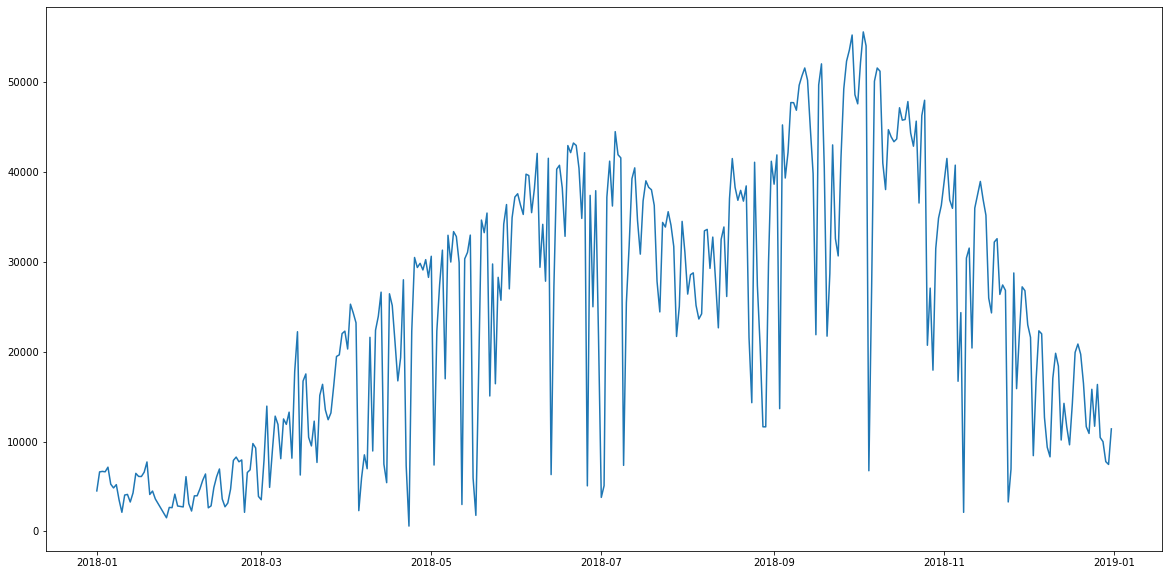

In [197]:
plt.figure(figsize=(20, 10))
plt.plot(Rentals_by_date['Date'],Rentals_by_date['Rentals'])
plt.show()

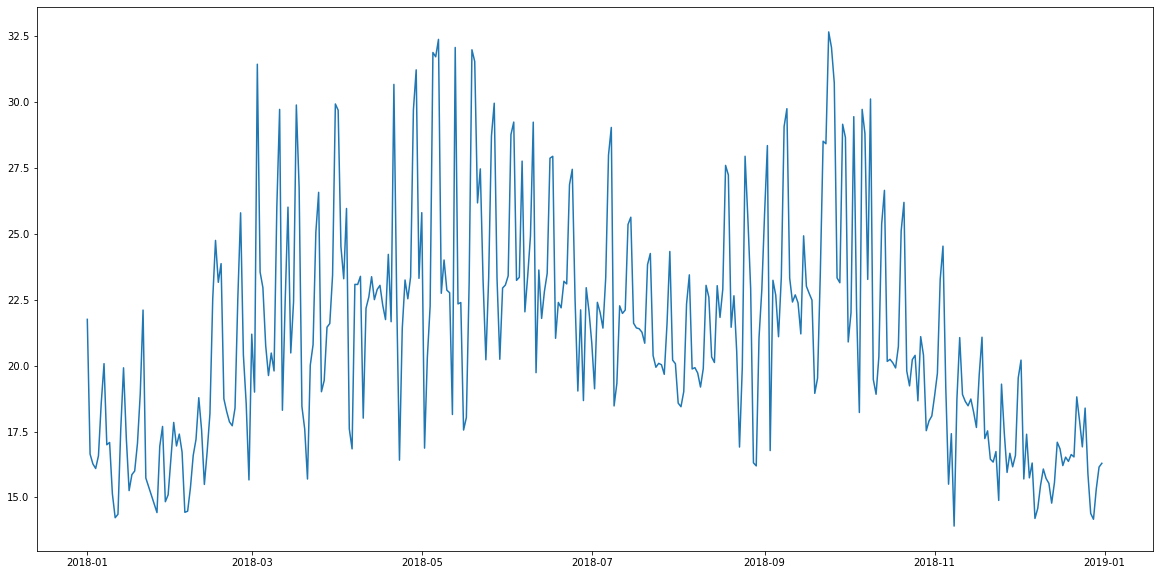

In [203]:
plt.figure(figsize=(20, 10))
plt.plot(Rentals_by_date['Date'],Rentals_by_date['Avg Duration'])
plt.show()

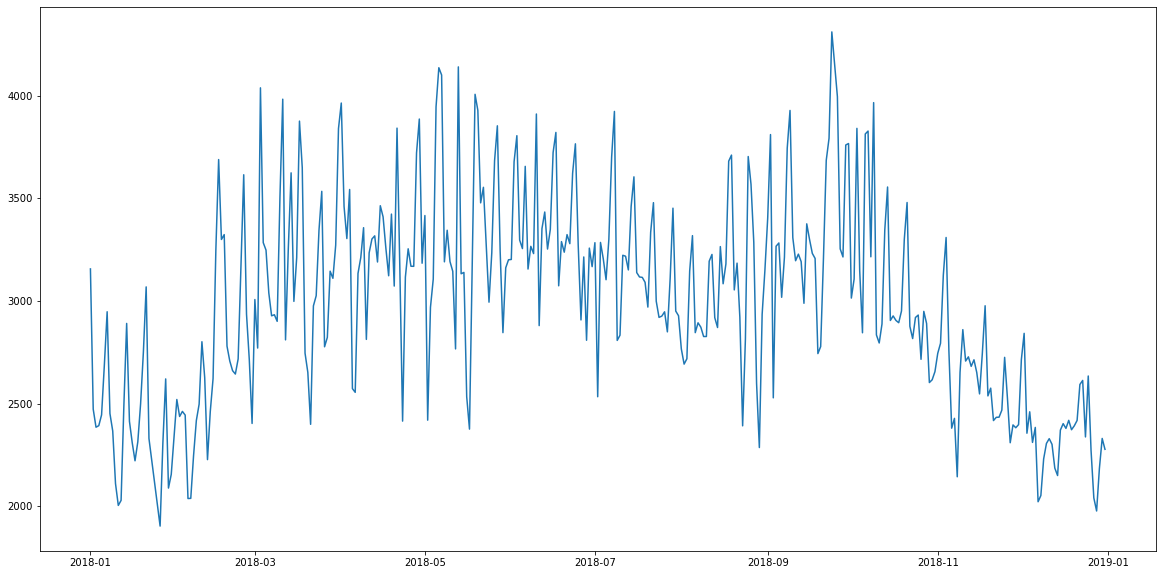

In [207]:
plt.figure(figsize=(20, 10))
plt.plot(Rentals_by_date['Date'],Rentals_by_date['Avg Distance'])
plt.show()

In [279]:
Rentals_by_date['Avg Distance'].mean()

2996.5015422001957

In [281]:
Rentals_by_date['Avg Duration'].mean()

21.258651808115186

In [212]:
Location2Location_df = pd.DataFrame(index=Unique_Locations,columns=Unique_Locations)

In [213]:
Location2Location_df

,164.433025,164.586353,164.598110,164.596367,164.582252,164.581035,164.396255,164.472088,164.592243,164.508889,...,164.592274,164.598370,164.680035,164.696663,164.632916,164.377422,164.522808,164.489593,164.502781,164.575737
164.433025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.586353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.598110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.596367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.582252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164.377422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.522808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.489593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.502781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
Location2Location_df.index[0]

164.433025

In [224]:
Location2Location_df.iloc[0,1] = 1

In [226]:
Location2Location_df.iloc[0,0] = 1

In [227]:
Location2Location_df

,164.433025,164.586353,164.598110,164.596367,164.582252,164.581035,164.396255,164.472088,164.592243,164.508889,...,164.598370,164.680035,164.696663,164.632916,164.377422,164.522808,164.489593,164.502781,164.575737,361.000000
164.433025,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.586353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.598110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.596367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.582252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164.522808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.489593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.502781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.575737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df_NoOutliers['Pdate'][(df_NoOutliers['Pickup Location'] ==164.433025) & (df_NoOutliers['Dropoff Location'] ==164.433025)].count()



1334

In [260]:
Location2Location_df.columns[1]

164.586353

In [261]:
Location2Location_df.iloc[0,2]

0

In [270]:
Row_Start = 0
Row_End = 1524
Column_Start = 0
Column_End = 1524
Iteration_Start = 0
Iteration_End = 1524

This Code took too long to run, so revised it below. 

while Iteration_Start < Iteration_End:
    Pickup_Location = Location2Location_df.index[Row_Start]
    Dropoff_Location = Location2Location_df.columns[Column_Start]
    
    Location2Location_df.iloc[Row_Start,Column_Start] = df_NoOutliers['Pdate'][(df_NoOutliers['Pickup Location'] == Pickup_Location) & (df_NoOutliers['Dropoff Location'] == Dropoff_Location)].count()

    
    Column_Start = Column_Start + 1
    if Column_Start == 1524: 
        Row_Start = Row_Start + 1
        Column_Start = 0
        Iteration_Start = Iteration_Start + 1
        print(Iteration_Start+1)
  
    

In [272]:
while Iteration_Start < Iteration_End:
    Pickup_Location = Location2Location_df.index[Row_Start]
    
    temp_df = df_NoOutliers[df_NoOutliers['Pickup Location'] == Pickup_Location]
    Dropoff_list = list(temp_df['Dropoff Location'].unique())
    
    for i in Dropoff_list:
        Location2Location_df.loc[Pickup_Location,i] = temp_df['Pdate'][(temp_df['Pickup Location'] == Pickup_Location) & (temp_df['Dropoff Location'] == i)].count()

    
    
    Row_Start = Row_Start + 1
    Iteration_Start = Iteration_Start + 1
    print(Iteration_Start+1)
  

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [273]:
Location2Location_df

,164.433025,164.586353,164.598110,164.596367,164.582252,164.581035,164.396255,164.472088,164.592243,164.508889,...,164.598370,164.680035,164.696663,164.632916,164.377422,164.522808,164.489593,164.502781,164.575737,361.000000
164.433025,1334,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
164.586353,0,2085,10,105,12,5,0,0,127,0,...,0,0,0,0,0,0,0,0,0,0.0
164.598110,0,14,323,10,1,0,0,0,457,0,...,0,0,0,0,0,0,0,0,0,0.0
164.596367,0,187,3,503,173,6,0,0,27,0,...,0,0,0,0,0,0,0,0,0,0.0
164.582252,0,10,1,225,941,56,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164.522808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.489593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
164.502781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
164.575737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
Location2Location_df.to_excel(r'/Users/markclampitt/Documents/Springboard/Capstone3\Location2Location_df.xlsx', sheet_name='Location2Location', index = True)

